## Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality?
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of 7. bars with and without lecithin (L in the ingredients).
8. Summarize your findings.

## importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
# read the data frame
read_file = pd.read_csv("chocolate_bars.csv")
read_file

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [6]:
# check for an overall view of the dataframe
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [7]:
# check for any null values in the data
read_file.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

it is observed that the num_ingredients and ingredients has empty values

In [9]:
# check for duplicate
read_file.duplicated().sum()

0

In [13]:
read_file.describe(include = 'object')


,manufacturer,company_location,bean_origin,bar_name,ingredients,review
count,2530,2530,2530,2530,2443,2530
unique,580,67,62,1605,21,2487
top,Soma,U.S.A.,Venezuela,Madagascar,"B,S,C","spicy, cocoa"
freq,56,1136,253,55,999,4


In [14]:
read_file.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


In [16]:
read_file["num_ingredients"].dtype

dtype('float64')

In [17]:
read_file["ingredients"].dtype

dtype('O')

In [18]:
read_file["num_ingredients"].mean() 

3.0413426115431847

In [19]:
read_file["ingredients"].mode()

0    B,S,C
Name: ingredients, dtype: object

In [20]:
read_file["ingredients"].fillna(value = "B,S,C", inplace = True)


In [21]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2530 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [22]:
read_file["num_ingredients"].fillna(value = 3.0, inplace = True)

In [23]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2530 non-null   float64
 8   ingredients       2530 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [24]:
read_file["ingredients"].fillna(value = "B,S,C", inplace = True)


In [25]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2530 non-null   float64
 8   ingredients       2530 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [27]:
read_file.isnull().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

## rating by country of origin

In [15]:
aveg_rating = read_file.groupby("bean_origin",as_index = False)[["rating"]].mean().sort_values(by='rating',ascending = False)
aveg_rating

,bean_origin,rating
54,Tobago,3.625000
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
...,...,...
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
30,Martinique,2.750000


## How many bars were reviewed for each of those countries?

In [24]:
review = read_file.groupby("bean_origin", as_index = False)[["review"]].count().sort_values(by='review',ascending=False)
review

,bean_origin,review
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


## Create plots to visualize findings for questions 1 and 2.

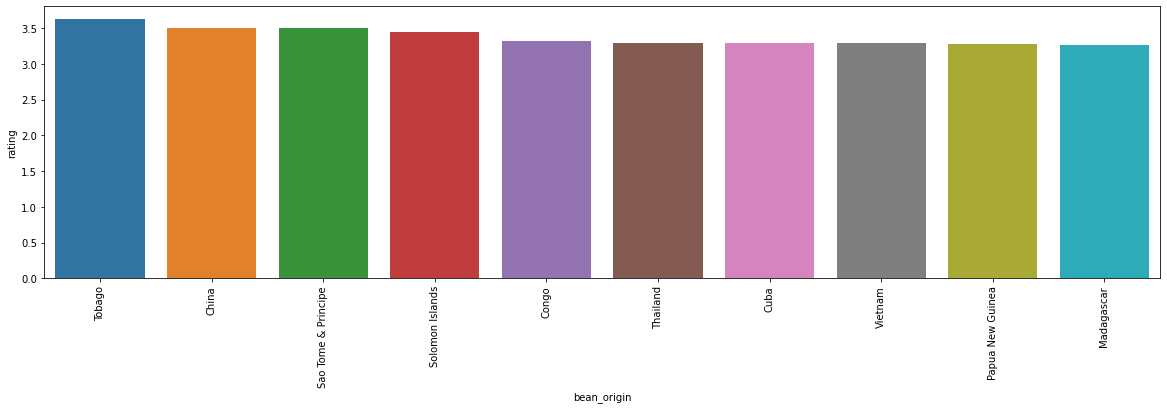

In [16]:
plt.figure(figsize = (20, 5))
sns.barplot( x = "bean_origin", y = "rating", data = aveg_rating[0:10] )
plt.xticks(rotation = 90);

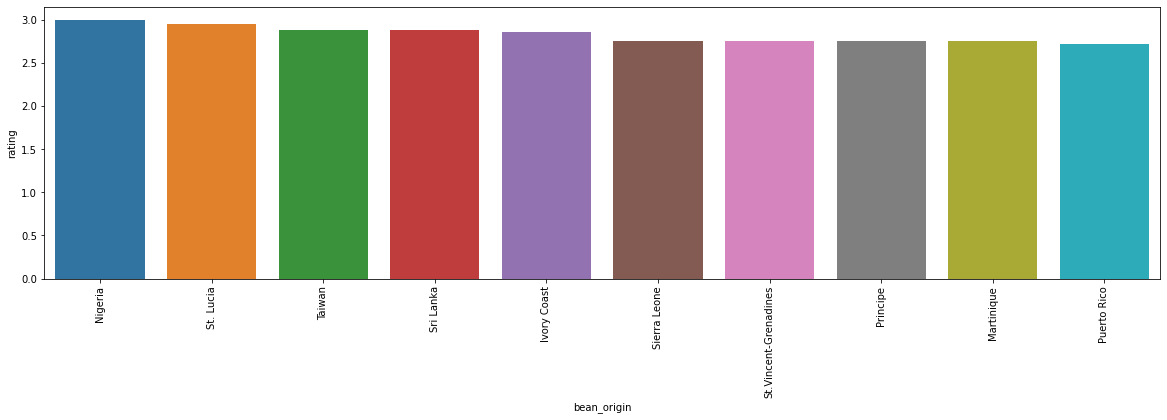

In [18]:
plt.figure(figsize = (20, 5))
sns.barplot( x = "bean_origin", y = "rating", data = aveg_rating[52:] )
plt.xticks(rotation = 90);

## Observations
* Average rating of the chocolate bar is highest for the country Tobago
* Average rating of the chocolate bar is lowest for the country Puerto Rico

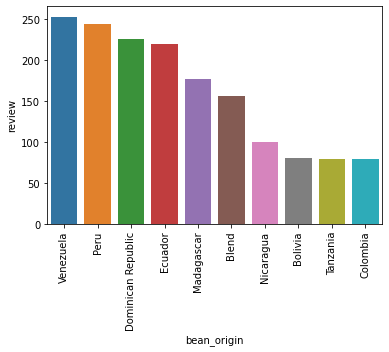

In [25]:

sns.barplot( x = "bean_origin", y = "review", data = review[0:10] )
plt.xticks(rotation = 90);

## Observations
* Highest numbers of bars were reviewed for the country Venezulea

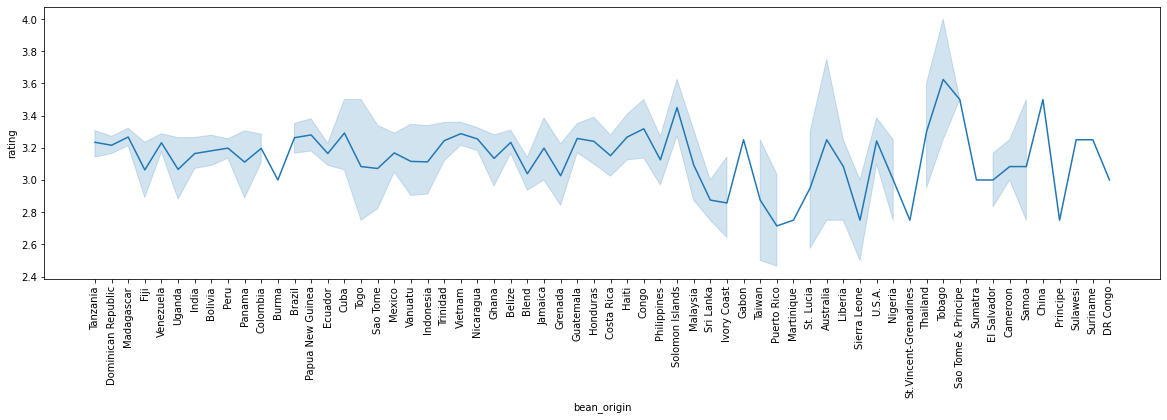

In [25]:
# CHECKING IF THE COCOA BEAN'S ORIGIN IS AN INDICATOR OF QUALITY 
# CHECK IF THE PATTERNS OF THE BEAN_ORIGIN vS RATING PLOT AND THE COCOA PERCENT  if directly proportional 
# coca bean's origin is an indicator of quality 
plt.figure(figsize=(20,5))
sns.lineplot(x='bean_origin', y='rating', data= read_file)
plt.xticks(rotation=90);

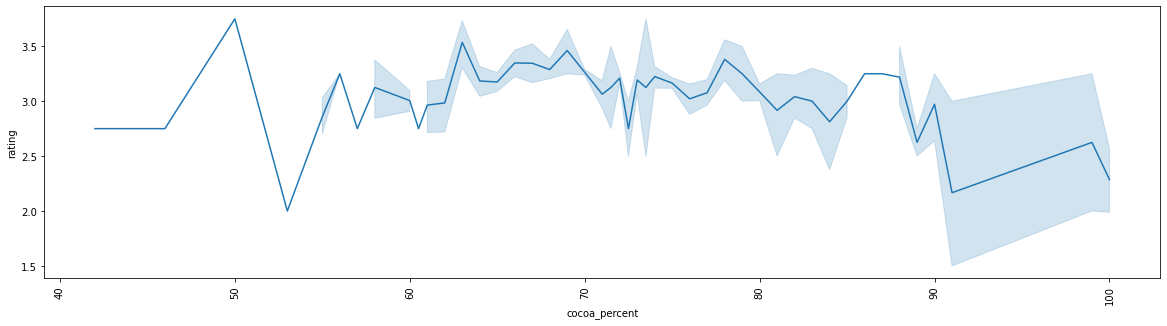

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(x='cocoa_percent', y='rating', data=read_file)
plt.xticks(rotation=90);

## observations
* we can see that patterns are different and where the 
* Coca percent is not high we can see that there are high ratings with bean's origin
* therefore we conclude that the cocoa bean origin is not an indicator of quality

In [ ]:
# OPTIONAL Question 
# How does cocoa content relate to rating? What is the average 
# cocoa content for bars with higher ratings (above 3.5)?

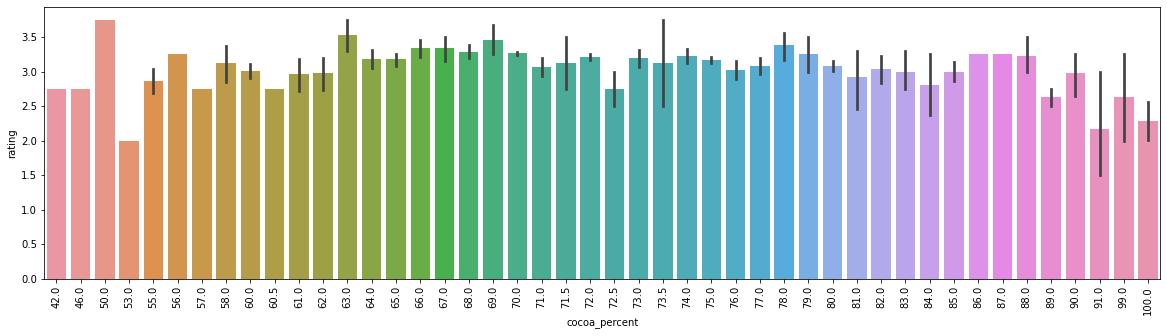

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(x='cocoa_percent', y='rating', data=read_file)
plt.xticks(rotation=90);

In [ ]:
### From the above barplot no defined relationship is there between Coca percent and
#rating as can be seen for lower Coca percent as 50 there is a hight rating above 3.5 and also for a relatively
#high cocoa percent as 87 we have a high rating also 

In [28]:
choc_bar_drna = read_file.dropna()
avg_rating_with_lec = choc_bar_drna[choc_bar_drna["ingredients"].str.contains("L")].rating.mean()
avg_rating_without_lec = choc_bar_drna[~choc_bar_drna["ingredients"].str.contains("L")].rating.mean()
print("Average rating with lecithin "+str(avg_rating_with_lec))
print("Average rating without lecithin "+str(avg_rating_without_lec))

Average rating with lecithin 3.150608519269777
Average rating without lecithin 3.2251282051282053


In [29]:
year_bar_count=(read_file.groupby("year_reviewed").bar_name.count().reset_index()year_bar_count

,year_reviewed,bar_name
0,2006,62
1,2007,73
2,2008,92
3,2009,123
4,2010,110
5,2011,163
6,2012,194
7,2013,183
8,2014,247
9,2015,284


<AxesSubplot:xlabel='year_reviewed', ylabel='bar_name'>

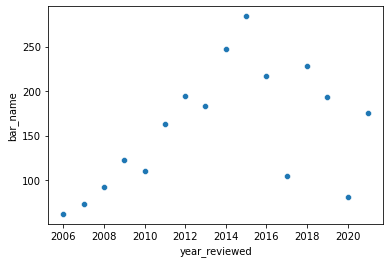

In [30]:
sns.scatterplot(x="year_reviewed",y="bar_name",data=year_bar_count)

## Observations
* Highest number of bars were reviewed in the year 2015.
* Lowest number of bars were reviewed in the year 2006

# overall observations/findings
* There are more chocolate bars with rating greater than 3.
* Most of the cholocolate bars have 3 ingredients.
* Average rating of the chocolate bar is highest for the country Tobago
* Average rating of the chocolate bar is lowest for the country Puerto Rico
* Highest numbers of bars were reviewed for the country Venezulea
* Cocoa bean's origin is not an indicator of quality
* The average rating of bars without lecithin is more than the average rating of bars with lecithin/////